In [49]:
import gzip
import json
import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
                    ConfusionMatrixDisplay,
                   classification_report,
                   confusion_matrix,)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [50]:
df = pd.read_csv("data/bankrupt_data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [51]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [52]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("?", "")

In [53]:
df.head()

,Bankrupt,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [54]:
df.isnull().sum()

Bankrupt                                                    0
_ROA(C)_before_interest_and_depreciation_before_interest    0
_ROA(A)_before_interest_and_%_after_tax                     0
_ROA(B)_before_interest_and_depreciation_after_tax          0
_Operating_Gross_Margin                                     0
                                                           ..
_Liability_to_Equity                                        0
_Degree_of_Financial_Leverage_(DFL)                         0
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         0
_Net_Income_Flag                                            0
_Equity_to_Liability                                        0
Length: 96, dtype: int64

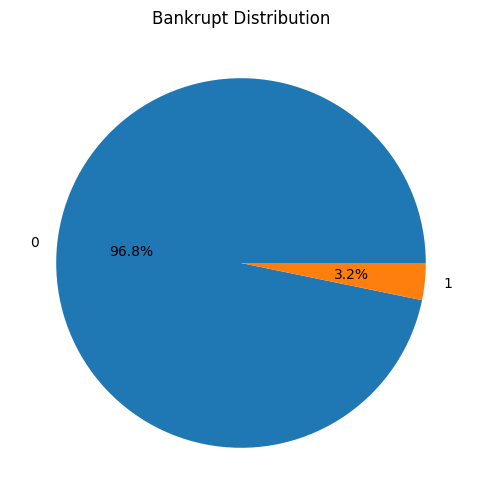

Bankrupt
0    0.967737
1    0.032263
Name: proportion, dtype: float64

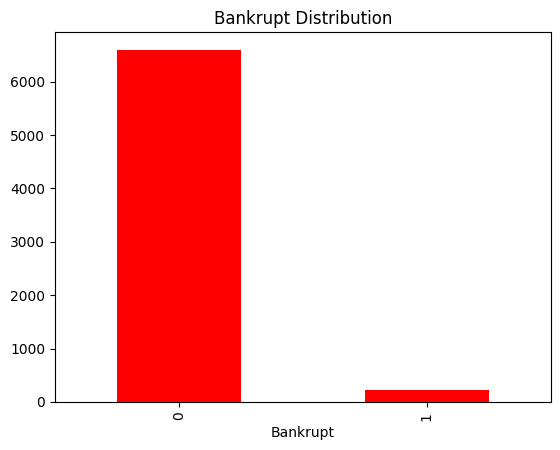

In [55]:
fig = plt.figure(figsize=(10, 6))
df["Bankrupt"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="Bankrupt Distribution")
plt.ylabel('')
plt.show()
df["Bankrupt"].value_counts().plot(kind="bar", title="Bankrupt Distribution", color="red")
df["Bankrupt"].value_counts(normalize=True)


In [56]:
df.columns

Index(['Bankrupt', '_ROA(C)_before_interest_and_depreciation_before_interest',
       '_ROA(A)_before_interest_and_%_after_tax',
       '_ROA(B)_before_interest_and_depreciation_after_tax',
       '_Operating_Gross_Margin', '_Realized_Sales_Gross_Margin',
       '_Operating_Profit_Rate', '_Pre-tax_net_Interest_Rate',
       '_After-tax_net_Interest_Rate',
       '_Non-industry_income_and_expenditure/revenue',
       '_Continuous_interest_rate_(after_tax)', '_Operating_Expense_Rate',
       '_Research_and_development_expense_rate', '_Cash_flow_rate',
       '_Interest-bearing_debt_interest_rate', '_Tax_rate_(A)',
       '_Net_Value_Per_Share_(B)', '_Net_Value_Per_Share_(A)',
       '_Net_Value_Per_Share_(C)', '_Persistent_EPS_in_the_Last_Four_Seasons',
       '_Cash_Flow_Per_Share', '_Revenue_Per_Share_(Yuan_¥)',
       '_Operating_Profit_Per_Share_(Yuan_¥)',
       '_Per_Share_Net_profit_before_tax_(Yuan_¥)',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_

Summary statistics

In [67]:
df.describe()

,Bankrupt,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [72]:
df["_After-tax_Net_Profit_Growth_Rate"].describe().apply(lambda x: f"{x:.2f}")

count    6819.00
mean        0.69
std         0.01
min         0.00
25%         0.69
50%         0.69
75%         0.69
max         1.00
Name: _After-tax_Net_Profit_Growth_Rate, dtype: object

Text(0, 0.5, 'Frequency')

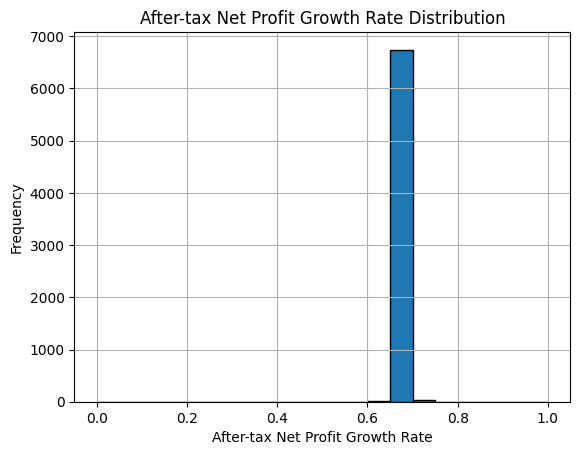

In [73]:
df["_After-tax_Net_Profit_Growth_Rate"].hist(bins=20, edgecolor='black')
plt.title("After-tax Net Profit Growth Rate Distribution")
plt.xlabel("After-tax Net Profit Growth Rate")
plt.ylabel("Frequency")


In [74]:
qi, q3 = df["_After-tax_Net_Profit_Growth_Rate"].quantile([0.25, 0.75])
iqr = q3 - qi
lower_bound = qi - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df["_After-tax_Net_Profit_Growth_Rate"] < lower_bound) | (df["_After-tax_Net_Profit_Growth_Rate"] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Outliers:\n{outliers[['_After-tax_Net_Profit_Growth_Rate', 'Bankrupt']]}")

Number of outliers: 1033
Outliers:
      _After-tax_Net_Profit_Growth_Rate  Bankrupt
6                              0.688590         0
30                             0.688191         1
36                             0.688702         0
56                             0.686085         1
82                             0.685482         0
...                                 ...       ...
6781                           0.690458         0
6783                           0.690341         0
6789                           0.688413         0
6808                           0.691160         0
6817                           0.696113         0

[1033 rows x 2 columns]


<Axes: xlabel='Bankrupt', ylabel='_After-tax_Net_Profit_Growth_Rate'>

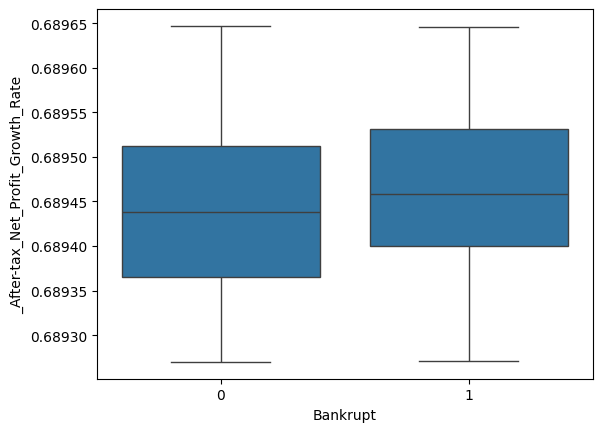

In [82]:
q1, q3 = df["_After-tax_Net_Profit_Growth_Rate"].quantile([0.25, 0.75])
mask_q =df["_After-tax_Net_Profit_Growth_Rate"].between(q1, q3)
mask_q.head()

sns.boxplot(x="Bankrupt", y="_After-tax_Net_Profit_Growth_Rate", data=df[mask_q])

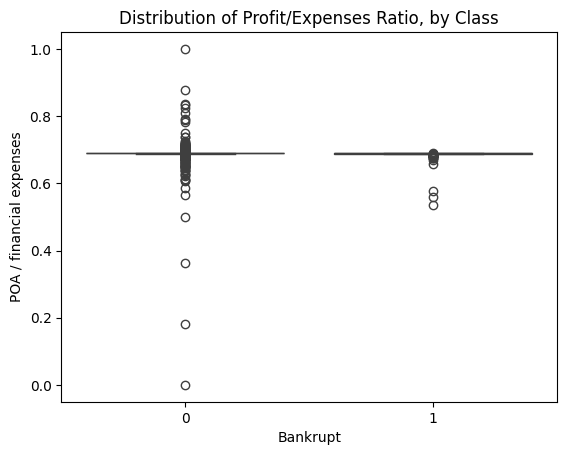

In [57]:
# Create boxplot
sns.boxplot(x="Bankrupt", y="_After-tax_Net_Profit_Growth_Rate", data=df)



plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [58]:
target = "Bankrupt"
X = df.drop(columns=[target])
y = df[target] 
print(X.shape, y.shape)

(6819, 95) (6819,)


In [59]:
X

,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [60]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 6819, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


In [87]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape, y_train_over.shape)
X_train_over.head()

(10558, 95) (10558,)


,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,0.493784,0.550153,0.544622,0.598524,0.598524,0.998980,0.797443,0.809355,0.303595,0.781616,...,0.806631,0.001637,0.623661,0.598521,0.840649,0.276281,0.026814,0.565265,1,0.070742
1,0.534393,0.590765,0.573425,0.599302,0.599173,0.999023,0.797454,0.809359,0.303524,0.781621,...,0.827723,0.001079,0.624307,0.599298,0.843248,0.282615,0.026852,0.565433,1,0.022433
2,0.526398,0.586895,0.566519,0.606740,0.606740,0.999103,0.797606,0.809470,0.303622,0.781718,...,0.828627,0.002505,0.624714,0.606739,0.841982,0.276632,0.026791,0.565159,1,0.059856
3,0.469702,0.536851,0.521066,0.595375,0.595375,0.998967,0.797390,0.809313,0.303530,0.781572,...,0.797846,0.003100,0.624621,0.595370,0.840248,0.283786,0.027673,0.567450,1,0.020864
4,0.391557,0.443197,0.432464,0.664495,0.664495,0.995856,0.794096,0.806216,0.304281,0.777918,...,0.756573,0.000198,0.624242,0.664491,0.838115,0.275114,0.026791,0.565158,1,0.233952


In [88]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape, y_train_under.shape)
X_train_under.head()

(352, 95) (352,)


,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
3385,0.864964,0.942706,0.932598,0.622371,0.622371,0.999308,0.797793,0.809673,0.303519,0.781960,...,0.959320,0.000227,0.624001,0.622370,0.849236,0.276178,0.026791,0.565158,1,0.074893
3474,0.541705,0.611971,0.588575,0.660582,0.660654,0.999635,0.798215,0.809990,0.303574,0.782226,...,0.844189,0.004650,0.624577,0.660577,0.842477,0.275346,0.026791,0.565158,1,0.155796
6415,0.473358,0.538378,0.526474,0.607352,0.607352,0.998974,0.797398,0.809323,0.303529,0.781582,...,0.800218,0.002532,0.623946,0.607350,0.840316,0.277365,0.026828,0.565326,1,0.046306
5721,0.473943,0.531672,0.527009,0.603158,0.603756,0.998946,0.797394,0.809316,0.303580,0.781564,...,0.796519,0.002455,0.635325,0.603158,0.840073,0.276416,0.026940,0.565782,1,0.066049
1057,0.534149,0.550425,0.575834,0.607367,0.607367,0.999037,0.797467,0.809379,0.303518,0.781643,...,0.806938,0.004775,0.624067,0.607365,0.840802,0.278058,0.026935,0.565761,1,0.038899


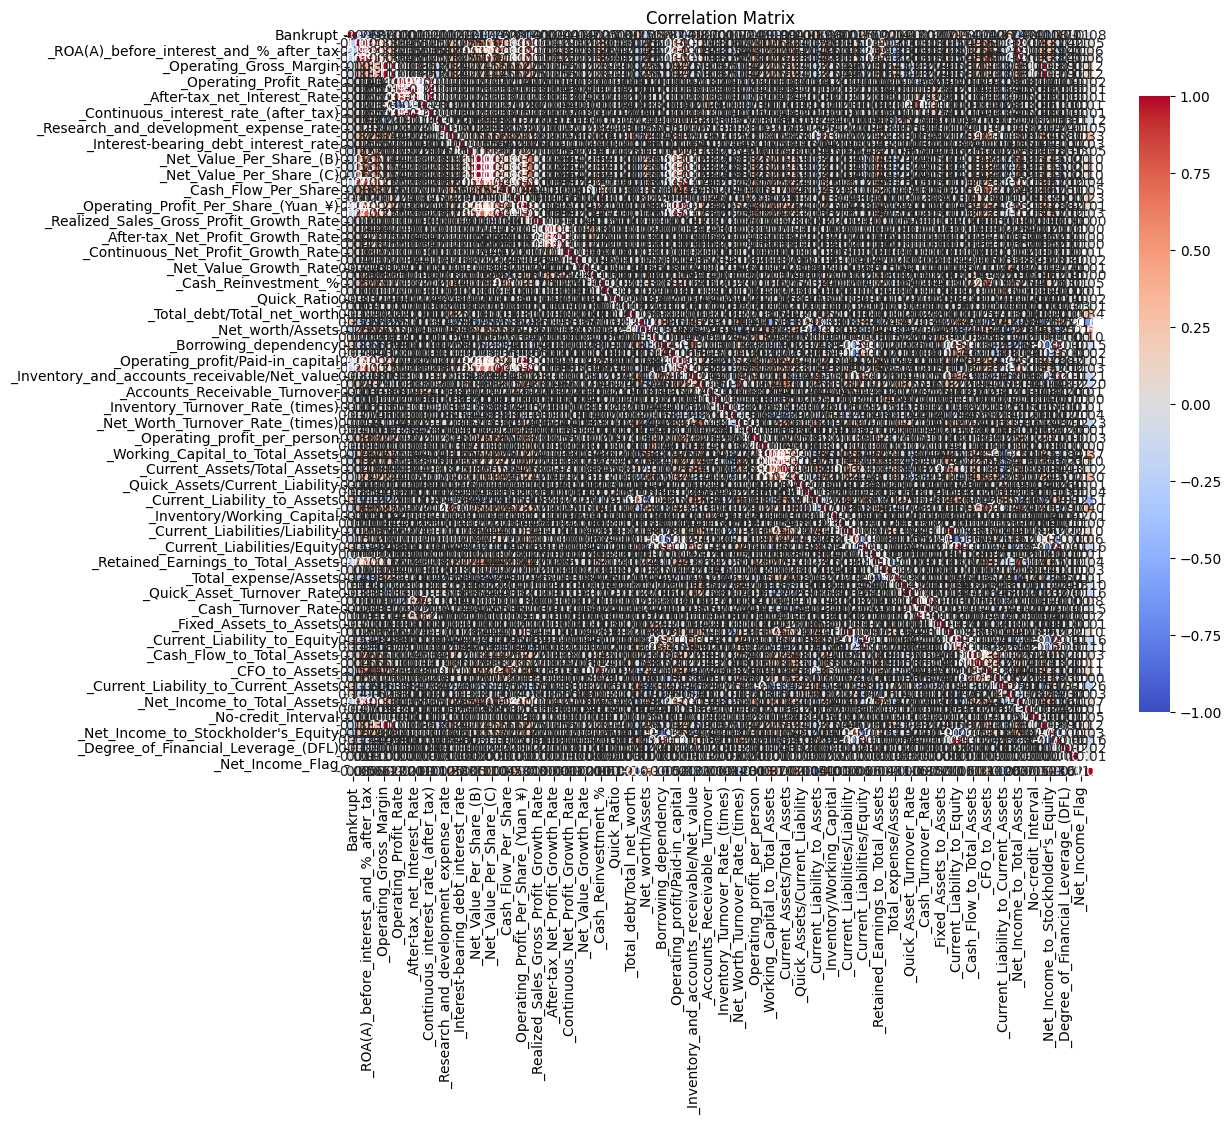

In [64]:
corr = df.corr()
plt.figure(figsize=(12, 10))
plt.title("Correlation Matrix")
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.show()

In [84]:
acc_baseline = df["Bankrupt"].value_counts(normalize=True).max()
print("Baseline accuracy:", round(acc_baseline, 2))

Baseline accuracy: 0.97


In [90]:
model_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42))
model_reg.fit(X_train, y_train)

model_under = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42))
model_under.fit(X_train_under, y_train_under)

model_over = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42))
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [92]:
for m in [model_reg, model_under, model_over]:
    accuracy_training =m.score(X_train, y_train)
    accuracy_test = m.score(X_test, y_test)
    print("Training Accuraccy:", round(accuracy_training, 4))
    print("Test Accuracy:", round(accuracy_test, 4))

Training Accuraccy: 1.0
Test Accuracy: 0.9604
Training Accuraccy: 0.8308
Test Accuracy: 0.8035
Training Accuraccy: 1.0
Test Accuracy: 0.9567




1. *Model 1*: Training Accuracy: 1.0 (perfect score), Test Accuracy: 0.9604 (slightly lower, indicating potential overfitting)
2. *Model 2*: Training Accuracy: 0.8308, Test Accuracy: 0.8035 (lower scores, might indicate underfitting or room for improvement)
3. *Model 3*: Training Accuracy: 1.0 (perfect score), Test Accuracy: 0.9567 (similar to Model 1, potential overfitting)

Overfitting occurs when a model performs exceptionally well on training data but slightly worse on unseen test data.



In [95]:
print(accuracy_test, accuracy_training)

0.9567448680351907 1.0


In [101]:
cm = confusion_matrix(y_train, model_reg.predict(X_train))
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[5279    0]
 [   0  176]]


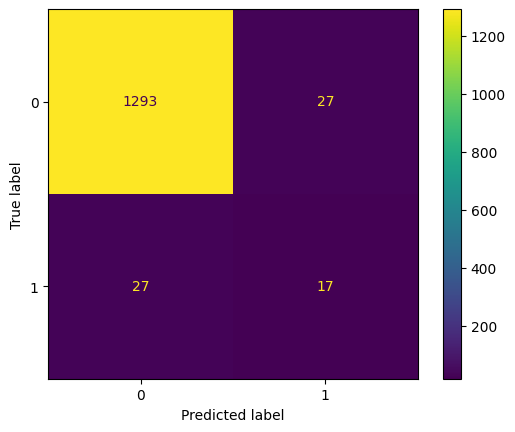

In [97]:
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test);


 analysis of the Confusion Matrix:

*Class 0 (Negative Class):* 5279 samples

- True Negatives (TN): 5279
- False Positives (FP): 0

*Class 1 (Positive Class):* 176 samples

- True Positives (TP): 176
- False Negatives (FN): 0

*Key Insights:*

1. *Perfect classification*: The model seems to have perfectly classified all samples, with no False Positives or False Negatives.
2. *No misclassifications*: The model has accurately predicted both classes.

*Performance Metrics:*

1. Accuracy: (5279 + 176) / (5279 + 176) = 1.0 (or 100%)
2. Precision: 176 / (176 + 0) = 1.0 (or 100%)
3. Recall: 176 / (176 + 0) = 1.0 (or 100%)
4. F1-score: 2 * (1.0 * 1.0) / (1.0 + 1.0) = 1.0 (or 100%)

The model appears to be performing exceptionally well!


In [100]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print("Decision Tree Depth:", depth)

Decision Tree Depth: 65


A decision tree depth of 65 refers to the maximum number of edges from the root node to any leaf node in a decision tree model. This depth directly impacts the complexity of the tree.

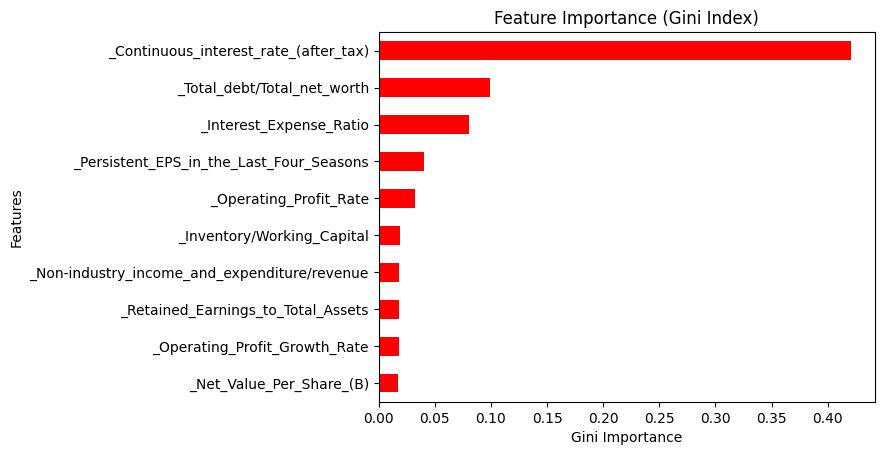

In [110]:
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_
feat_impt = pd.Series(importances, index=X_train_over.columns).sort_values()
feat_impt.tail(10).plot(kind="barh", color ="r")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Gini Index)")
plt.show()

In [111]:
with open("model-1.pkl", "wb") as f:
    pickle.dump(model_over, f)
    print("Model saved to model-1.pkl")

Model saved to model-1.pkl


In [123]:
with open("model-1.pkl", "rb") as f:
    model_loaded = pickle.load(f)
    print(model_loaded)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])


# BUILD  ENSEMBLE MODEL 
Ensemble models work by building multiple models on random subsets of the same data, and then comparing their predictions to make a final prediction. Since we used a decision tree in the model we're going to create an ensemble of trees here. This type of model is called a random forest.

In [125]:
acc_baseline = df["Bankrupt"].value_counts(normalize=True).max()
print("Baseline accuracy:", round(acc_baseline, 2))

Baseline accuracy: 0.97


In [129]:
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [139]:
clf.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [142]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print("Cross Validation Score:", cv_acc_scores)

Cross Validation Score: [0.99100379 0.99195076 0.99715909 0.99526291 0.9947892 ]


# An analysis of the Cross Validation Scores:

Key Insights:*

1. *High scores*: All scores are above 0.99, indicating excellent model performance across different folds.
2. *Consistency*: Scores are consistent, with a small range (0.9910 to 0.9972), suggesting stable model performance.
3. *Average score*: Mean score ≈ 0.9940, indicating overall strong model performance.

In [143]:
params = {
    "simpleimputer__strategy": ["mean","median"],
    "randomforestclassifier__n_estimators":range(25,100,25) ,
    "randomforestclassifier__max_depth":range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [144]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [145]:
# Train model
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [146]:
model.cv_results_

{'mean_fit_time': array([2.19284935, 1.7792377 , 3.87096171, 4.34502063, 6.02871861,
        5.16817994, 2.14719868, 2.23188601, 4.35820236, 4.50003405,
        5.76680403, 6.00132575, 2.25785232, 2.57148299, 4.16826663,
        4.35473828, 6.29258237, 6.53539429, 2.28868651, 2.32013397,
        4.22390847, 4.49863071, 6.51595092, 6.12558727]),
 'std_fit_time': array([0.26991447, 0.04630106, 0.47632638, 0.20940458, 0.54683823,
        0.07387892, 0.0997279 , 0.06348607, 0.08426751, 0.24221621,
        0.0624275 , 0.11066212, 0.06869645, 0.11699043, 0.14796385,
        0.09038604, 0.04792749, 0.1384052 , 0.0695158 , 0.07882272,
        0.0508989 , 0.09855143, 0.09152589, 0.51362008]),
 'mean_score_time': array([0.0284287 , 0.02648349, 0.05664091, 0.041257  , 0.04572096,
        0.04634905, 0.03245473, 0.02828536, 0.04510212, 0.03752165,
        0.05508714, 0.05982828, 0.07379866, 0.03733063, 0.04362717,
        0.04304433, 0.05640149, 0.05329885, 0.03250399, 0.02713819,
        0.043655

In [147]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.192849,0.269914,0.028429,0.005519,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973485,0.977273,0.981534,0.981052,0.985315,0.979732,0.004031,19
1,1.779238,0.046301,0.026483,0.002949,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973485,0.977273,0.981534,0.981052,0.985315,0.979732,0.004031,19
2,3.870962,0.476326,0.056641,0.046352,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.972064,0.976799,0.981534,0.980104,0.983420,0.978784,0.003997,23
3,4.345021,0.209405,0.041257,0.008873,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.972064,0.976799,0.981534,0.980104,0.983420,0.978784,0.003997,23
4,6.028719,0.546838,0.045721,0.003480,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.972064,0.977273,0.982955,0.981999,0.984368,0.979732,0.004513,19
5,5.168180,0.073879,0.046349,0.002061,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.972064,0.977273,0.982955,0.981999,0.984368,0.979732,0.004513,19
6,2.147199,0.099728,0.032455,0.004070,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.981061,0.983428,0.991951,0.990052,0.989578,0.987214,0.004202,17
7,2.231886,0.063486,0.028285,0.004903,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.981061,0.983428,0.991951,0.990052,0.989578,0.987214,0.004202,17
8,4.358202,0.084268,0.045102,0.007760,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.982008,0.983428,0.993371,0.991000,0.990526,0.988066,0.004495,13
9,4.500034,0.242216,0.037522,0.003050,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.982008,0.983428,0.993371,0.991000,0.990526,0.988066,0.004495,13


In [148]:
mask= cv_results["param_randomforestclassifier__max_depth"]==10
cv_results[mask]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.192849,0.269914,0.028429,0.005519,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973485,0.977273,0.981534,0.981052,0.985315,0.979732,0.004031,19
1,1.779238,0.046301,0.026483,0.002949,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973485,0.977273,0.981534,0.981052,0.985315,0.979732,0.004031,19
2,3.870962,0.476326,0.056641,0.046352,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.972064,0.976799,0.981534,0.980104,0.983420,0.978784,0.003997,23
3,4.345021,0.209405,0.041257,0.008873,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.972064,0.976799,0.981534,0.980104,0.983420,0.978784,0.003997,23
4,6.028719,0.546838,0.045721,0.003480,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.972064,0.977273,0.982955,0.981999,0.984368,0.979732,0.004513,19
5,5.168180,0.073879,0.046349,0.002061,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.972064,0.977273,0.982955,0.981999,0.984368,0.979732,0.004513,19


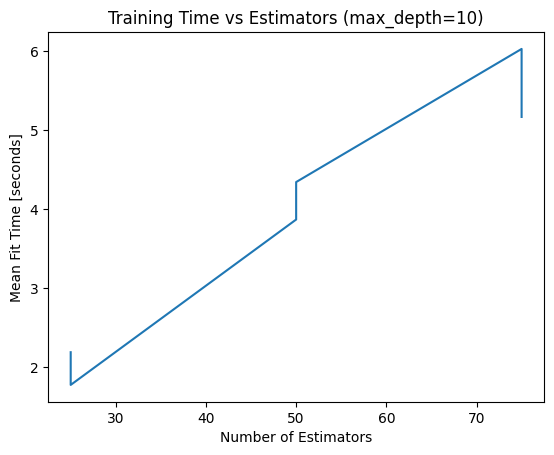

In [149]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"]==10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

In [150]:
mask=cv_results["param_randomforestclassifier__n_estimators"]==25
cv_results[mask]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.192849,0.269914,0.028429,0.005519,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973485,0.977273,0.981534,0.981052,0.985315,0.979732,0.004031,19
1,1.779238,0.046301,0.026483,0.002949,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973485,0.977273,0.981534,0.981052,0.985315,0.979732,0.004031,19
6,2.147199,0.099728,0.032455,0.004070,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.981061,0.983428,0.991951,0.990052,0.989578,0.987214,0.004202,17
7,2.231886,0.063486,0.028285,0.004903,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.981061,0.983428,0.991951,0.990052,0.989578,0.987214,0.004202,17
12,2.257852,0.068696,0.073799,0.079187,30,25,mean,"{'randomforestclassifier__max_depth': 30, 'ran...",0.989110,0.988636,0.994792,0.993842,0.993842,0.992044,0.002617,11
13,2.571483,0.116990,0.037331,0.007592,30,25,median,"{'randomforestclassifier__max_depth': 30, 'ran...",0.989110,0.988636,0.994792,0.993842,0.993842,0.992044,0.002617,11
18,2.288687,0.069516,0.032504,0.004734,40,25,mean,"{'randomforestclassifier__max_depth': 40, 'ran...",0.990530,0.990057,0.995739,0.996210,0.995737,0.993655,0.002754,5
19,2.320134,0.078823,0.027138,0.000760,40,25,median,"{'randomforestclassifier__max_depth': 40, 'ran...",0.990530,0.990057,0.995739,0.996210,0.995737,0.993655,0.002754,5


In [151]:
model.best_score_

np.float64(0.9942226773897189)

In [152]:
model.best_index_

np.int64(20)

In [153]:
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=50,
                                        random_state=42))])

In [154]:
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

In [155]:
# Extract best hyperparameters
model.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1], shape=(10558,))

In [156]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9699


In [157]:
y_test.value_counts()

Bankrupt
0    1320
1      44
Name: count, dtype: int64

In [160]:
y_test.value_counts(normalize=True)

Bankrupt
0    0.967742
1    0.032258
Name: proportion, dtype: float64

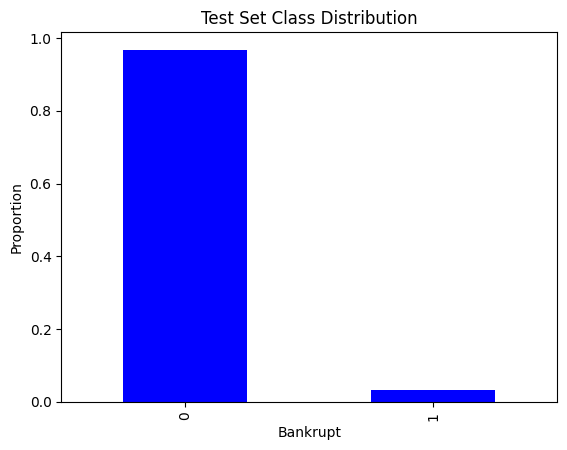

In [161]:
y_test.value_counts(normalize=True).plot(kind="bar", title="Test Set Class Distribution", color="blue")
plt.xlabel("Bankrupt")
plt.ylabel("Proportion")
plt.show()

In [163]:
cm = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1307   13]
 [  28   16]]


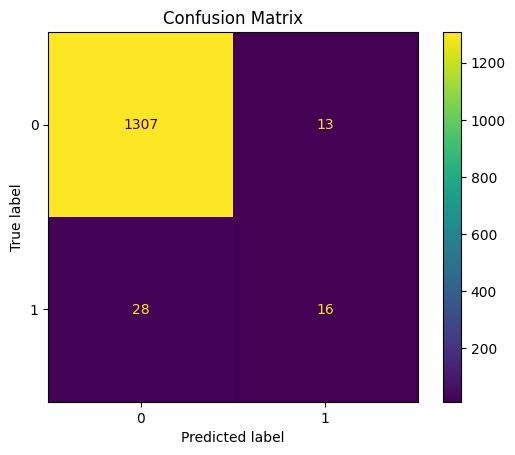

In [162]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()



*Class 0 (Negative Class):* 1320 samples (1307 + 13)

- True Negatives (TN): 1307
- False Positives (FP): 13

*Class 1 (Positive Class):* 44 samples (28 + 16)

- True Positives (TP): 16
- False Negatives (FN): 28

*Key Insights:*

1. *Room for improvement*: The model has some misclassifications, indicating potential for improvement.
2. *Class imbalance*: Class 0 has significantly more samples than Class 1.

*Performance Metrics:*

1. Accuracy: (1307 + 16) / (1307 + 13 + 28 + 16) = 0.97 (or 97%)
2. Precision: 16 / (16 + 13) = 0.55 (or 55%)
3. Recall: 16 / (16 + 28) = 0.36 (or 36%)
4. F1-score: 2 * (0.55 * 0.36) / (0.55 + 0.36) = 0.43 (or 43%)

The model performs well on the majority class (Class 0) but struggles with the minority class (Class 1)

In [164]:
importances = model.best_estimator_.named_steps[
"randomforestclassifier"
].feature_importances_
importances

array([1.92895141e-02, 1.87225092e-02, 1.69222235e-02, 3.02896540e-03,
       6.50493346e-03, 6.31789323e-03, 2.60606179e-02, 5.59816420e-03,
       1.06921434e-02, 4.71348649e-02, 2.41033562e-03, 2.91162873e-03,
       4.04480222e-03, 8.28004850e-03, 1.29992158e-02, 8.68015578e-03,
       8.47574646e-03, 7.42948272e-03, 4.03520939e-02, 3.24449028e-03,
       5.96134965e-03, 3.39535304e-03, 1.31946027e-02, 4.03181908e-03,
       4.77091178e-03, 3.20118319e-03, 3.26261089e-03, 4.70614228e-03,
       7.35657757e-03, 1.66171714e-02, 3.05370687e-03, 3.03338604e-03,
       5.04343541e-03, 8.27393008e-03, 1.21506861e-02, 4.51991512e-02,
       2.66218504e-02, 1.50778213e-02, 4.63258780e-03, 7.94358412e-02,
       2.90247027e-03, 4.08111437e-03, 1.30076971e-02, 4.18839142e-03,
       6.22070477e-03, 6.66928040e-03, 6.14022219e-03, 4.67540725e-03,
       4.92511540e-03, 2.82463174e-03, 3.44173570e-03, 4.09981821e-03,
       9.72714761e-03, 4.61576257e-03, 5.14200599e-03, 4.84515671e-03,
      

In [165]:
features = X_train_over.columns
features

Index(['_ROA(C)_before_interest_and_depreciation_before_interest',
       '_ROA(A)_before_interest_and_%_after_tax',
       '_ROA(B)_before_interest_and_depreciation_after_tax',
       '_Operating_Gross_Margin', '_Realized_Sales_Gross_Margin',
       '_Operating_Profit_Rate', '_Pre-tax_net_Interest_Rate',
       '_After-tax_net_Interest_Rate',
       '_Non-industry_income_and_expenditure/revenue',
       '_Continuous_interest_rate_(after_tax)', '_Operating_Expense_Rate',
       '_Research_and_development_expense_rate', '_Cash_flow_rate',
       '_Interest-bearing_debt_interest_rate', '_Tax_rate_(A)',
       '_Net_Value_Per_Share_(B)', '_Net_Value_Per_Share_(A)',
       '_Net_Value_Per_Share_(C)', '_Persistent_EPS_in_the_Last_Four_Seasons',
       '_Cash_Flow_Per_Share', '_Revenue_Per_Share_(Yuan_¥)',
       '_Operating_Profit_Per_Share_(Yuan_¥)',
       '_Per_Share_Net_profit_before_tax_(Yuan_¥)',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate'

In [166]:
feat_imp =pd.Series(importances, index=features).sort_values()
feat_imp

_Net_Income_Flag                         0.000000
_Liability-Assets_Flag                   0.000014
_Operating_Funds_to_Liability            0.002215
_Operating_Expense_Rate                  0.002410
_Current_Liability_to_Liability          0.002535
                                           ...   
_Total_debt/Total_net_worth              0.045199
_Continuous_interest_rate_(after_tax)    0.047135
_Retained_Earnings_to_Total_Assets       0.047638
_Net_Income_to_Total_Assets              0.055533
_Borrowing_dependency                    0.079436
Length: 95, dtype: float64

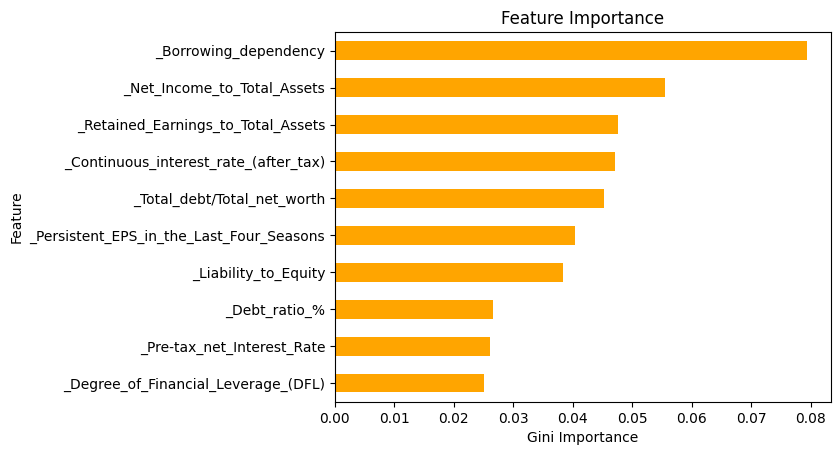

In [169]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps[
"randomforestclassifier"
].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh", color="orange")

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [170]:
# Save model
with open("model-2.pkl", "wb") as f:
    pickle.dump(model, f)

In [176]:
# Load model
with open("model-2.pkl", "rb") as f:
    model_loaded = pickle.load(f)
    print(model_loaded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)


# Build model using Gradient Boosting Classifier

In [177]:
cl = make_pipeline(
    SimpleImputer(),
    GradientBoostingClassifier()
    
)
print(cl)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])


In [178]:

params = {
    "simpleimputer__strategy": ["mean", "median"],
     "gradientboostingclassifier__n_estimators":[20,31,5],
    "gradientboostingclassifier__max_depth": [2, 5]
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': [20, 31, 5],
 'gradientboostingclassifier__max_depth': [2, 5]}

In [182]:
model = GridSearchCV(cl, 
                     param_grid=params, 
                     cv=5, 
                     n_jobs=-1,
                     verbose=1)
print(model)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': [2, 5],
                         'gradientboostingclassifier__n_estimators': [20, 31,
                                                                      5],
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)


In [183]:
# Fit model to over-sampled training data
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': [2, 5],
                         'gradientboostingclassifier__n_estimators': [20, 31,
                                                                      5],
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [185]:
#Get cross-validation results from a hyperparameter search in scikit-learn.
model.cv_results_

{'mean_fit_time': array([ 7.25331454,  7.43790898,  9.32561417, 10.33289499,  1.81056533,
         1.88729076, 13.85028238, 13.13702388, 19.71390171, 18.60283394,
         3.0746305 ,  2.90651655]),
 'std_fit_time': array([0.11015851, 0.14751963, 0.69829796, 0.56764754, 0.15162189,
        0.01896445, 0.40783245, 0.06525814, 0.55445331, 0.11078461,
        0.03553739, 0.22326119]),
 'mean_score_time': array([0.02306705, 0.01973248, 0.01927533, 0.02304187, 0.02933998,
        0.01802726, 0.02199364, 0.01905642, 0.01711941, 0.02361732,
        0.01495609, 0.01617498]),
 'std_score_time': array([0.00346554, 0.00341037, 0.0045323 , 0.00464097, 0.00919485,
        0.00220985, 0.00619406, 0.00037463, 0.00094945, 0.00540375,
        0.00031782, 0.00496197]),
 'param_gradientboostingclassifier__max_depth': masked_array(data=[2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        f

In [186]:
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,18.602834,0.110785,0.023617,0.005404,5,31,median,"{'gradientboostingclassifier__max_depth': 5, '...",0.966856,0.973011,0.976326,0.976788,0.977736,0.974143,0.003976,1
8,19.713902,0.554453,0.017119,0.000949,5,31,mean,"{'gradientboostingclassifier__max_depth': 5, '...",0.966856,0.971591,0.974905,0.977262,0.977736,0.973670,0.004043,2
6,13.850282,0.407832,0.021994,0.006194,5,20,mean,"{'gradientboostingclassifier__max_depth': 5, '...",0.962595,0.966383,0.971591,0.972525,0.975367,0.969692,0.004586,3
7,13.137024,0.065258,0.019056,0.000375,5,20,median,"{'gradientboostingclassifier__max_depth': 5, '...",0.962595,0.965909,0.971117,0.972525,0.974893,0.969408,0.004503,4
10,3.074630,0.035537,0.014956,0.000318,5,5,mean,"{'gradientboostingclassifier__max_depth': 5, '...",0.941288,0.953125,0.956913,0.955471,0.962577,0.953875,0.007021,5
11,2.906517,0.223261,0.016175,0.004962,5,5,median,"{'gradientboostingclassifier__max_depth': 5, '...",0.941761,0.952178,0.956439,0.954998,0.962577,0.953591,0.006823,6
3,10.332895,0.567648,0.023042,0.004641,2,31,median,"{'gradientboostingclassifier__max_depth': 2, '...",0.893466,0.906250,0.914299,0.907627,0.909048,0.906138,0.006898,7
2,9.325614,0.698298,0.019275,0.004532,2,31,mean,"{'gradientboostingclassifier__max_depth': 2, '...",0.893466,0.906250,0.914299,0.907627,0.909048,0.906138,0.006898,7
1,7.437909,0.147520,0.019732,0.003410,2,20,median,"{'gradientboostingclassifier__max_depth': 2, '...",0.877841,0.900568,0.900095,0.900047,0.901942,0.896099,0.009155,9
0,7.253315,0.110159,0.023067,0.003466,2,20,mean,"{'gradientboostingclassifier__max_depth': 2, '...",0.877841,0.900568,0.900095,0.900047,0.901942,0.896099,0.009155,9


In [187]:
# Extract best hyperparameters
model.best_params_

{'gradientboostingclassifier__max_depth': 5,
 'gradientboostingclassifier__n_estimators': 31,
 'simpleimputer__strategy': 'median'}

# MODEL EVALUATION

In [188]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9714
Validation Accuracy: 0.9465


# Key Insights:*

1. *Slight overfitting*: The training accuracy is higher than the validation accuracy, indicating potential overfitting.
2. *Good performance*: Both accuracies are high, suggesting the model performs well on both training and validation data.



# Plot confusion matrix

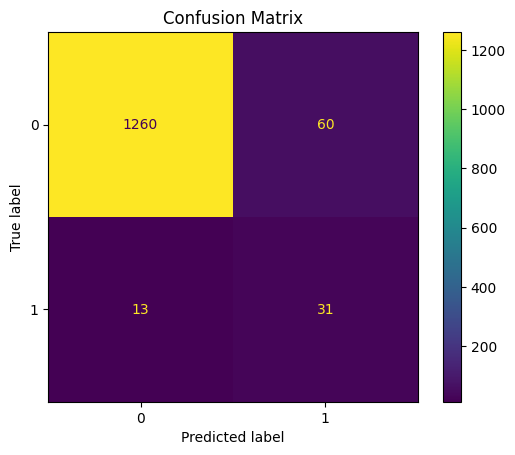

In [189]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

In [190]:
cm_df = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix:\n", cm_df)

Confusion Matrix:
 [[1260   60]
 [  13   31]]


# Analysis of the Confusion Matrix:

*Class 0 (Negative Class):* 1320 samples (1260 + 60)

- True Negatives (TN): 1260
- False Positives (FP): 60

*Class 1 (Positive Class):* 44 samples (13 + 31)

- True Positives (TP): 31
- False Negatives (FN): 13

*Key Insights:*

1. *Most samples correctly classified*: The model has a high number of True Negatives and True Positives.
2. *Some misclassifications*: There are 60 False Positives and 13 False Negatives.

*Performance Metrics:*

1. Accuracy: (1260 + 31) / (1260 + 60 + 13 + 31) = 0.9465 (or 94.65%)
2. Precision: 31 / (31 + 60) = 0.34 (or 34%)
3. Recall: 31 / (31 + 13) = 0.70 (or 70%)
4. F1-score: 2 * (0.34 * 0.70) / (0.34 + 0.70) = 0.46 (or 46%)

The model performs well overall but struggles with precision, likely due to class imbalance.



In [191]:
# Print classification report
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1320
           1       0.34      0.70      0.46        44

    accuracy                           0.95      1364
   macro avg       0.67      0.83      0.72      1364
weighted avg       0.97      0.95      0.96      1364



In [192]:
model.predict(X_test)[:5]

array([0, 0, 0, 0, 0])

In [208]:
model.predict_proba(X_test)[:5, -2]

array([0.94820177, 0.94919776, 0.96768802, 0.97032835, 0.96896306])

Profit: €3100000000
Losses: €15000000000


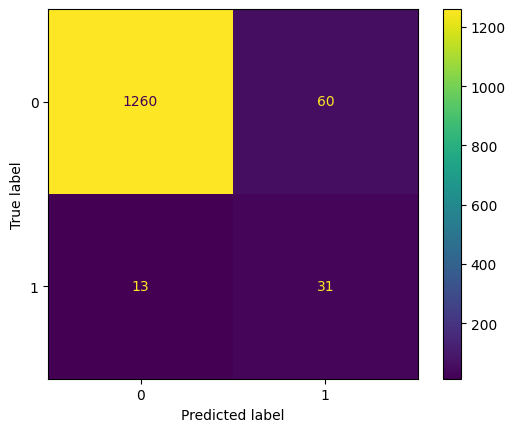

In [209]:
threshold =0.5

y_pred_proba = model.predict_proba(X_test)[:,-1]
y_pred = y_pred_proba> threshold
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
print((f"Profit: €{tp*100_000_000}"))

print((f"Losses: €{fp*250_000_000}"))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);